In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#lendo o dataframe
dataframe = pd.read_excel('/content/drive/MyDrive/Estudos/Pesquisa - Diversificação de Ações/Long - Short/Algoritmos/News_Code/Topic Modeling/BTC_News_2015_2023_150.xlsx')
dataframe


In [ ]:
# Convertendo a coluna 'data' para o tipo datetime
dataframe['Data'] = pd.to_datetime(dataframe['Data'] )
# Criando uma nova coluna com a combinação de dia, mês e ano
dataframe.set_index('Data', inplace=True)
# Exibindo o DataFrame resultante
dataframe


In [ ]:
df_filtrado_1 = dataframe['2021/09/22':'2021/11/04']
#df_filtrado_2 = dataframe['22/09/2021':'04/11/2021']
#df_filtrado_3 = dataframe['02/01/2022':'07/02/2022']
#df_filtrado_4 = dataframe['07/02/2022':'29/03/2022']
#df_filtrado_5 = dataframe['29/03/2022':'09/05/2022']
#df_filtrado_6 = dataframe['09/05/2022':'18/03/2023']
#df_filtrado_7 = dataframe['18/03/2023':'21/04/2023']
#df_filtrado_8 = dataframe['21/04/2023':'30/06/2023']


#Limpando os Dados



In [ ]:
dataframe = df_filtrado_1
#pd.concat([df_filtrado_7, df_filtrado_8])

In [ ]:
# Load the regular expression library
import re

# Remove punctuation
dataframe['Title'] = \
dataframe['Title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
dataframe['Title'] = \
dataframe['Title'].map(lambda x: x.lower())

# Print out the first rows of papers
dataframe['Title'].head()

#Remove Stopwords


In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



stop_words = stopwords.words('english')
stop_words.extend(['of', 'for', 'with', 'by', 'that', 'until', 'not', 'year', 'must', 'even', 'are','read', 'that', 'with', 'to', 'says', 'and', 'be', 'is', 'how'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = dataframe.Title.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['case', 'bitcoin', 'pakistan']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data_words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


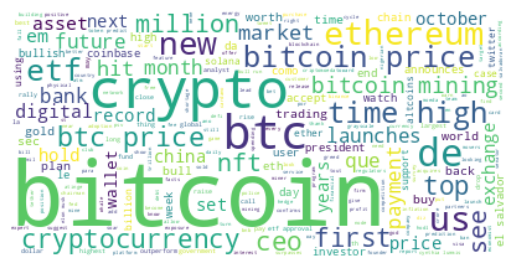

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join([','.join(doc) for doc in data_words])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#Lemmatization


In [ ]:
!python -m spacy download pt_core_news_sm

In [ ]:
import spacy
nlp = spacy.load('pt_core_news_sm')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

# Create an empty list to store the lemma data
lemma_data = []

for doc in data_words:
    doc2 = nlp(' '.join(doc))
    lemmas = [token.lemma_ for token in doc2 if token.pos_ == 'NOUN']
    lemma_data.append(lemmas)

# Create a DataFrame from the list of dictionaries
Lema = pd.DataFrame(lemma_data)

# Print the 'spacy_lemma' column
print(Lema)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           0           1         2     3     4     5     6
0      caser        None      None  None  None  None  None
1       cedi        None      None  None  None  None  None
2        one      raises  coinbase  None  None  None  None
3       jogo  recompensa      None  None  None  None  None
4       turn   bitcoiner      None  None  None  None  None
..       ...         ...       ...   ...   ...   ...   ...
420      joe        None      None  None  None  None  None
421  launche     service      None  None  None  None  None
422     None        None      None  None  None  None  None
423   metric       style      None  None  None  None  None
424   Warner      avatar      blue  None  None  None  None

[425 rows x 7 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


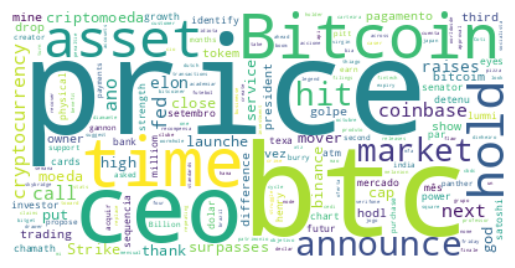

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join([','.join(doc) for doc in lemma_data])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=5, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Topics


In [ ]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess


# Create Dictionary
id2word = corpora.Dictionary(lemma_data)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(45, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.090*"bitcoin" + 0.034*"btc" + 0.023*"cryptocurrency" + 0.023*"moeda" + '
  '0.023*"boom" + 0.023*"bank" + 0.023*"put" + 0.023*"chamath" + '
  '0.012*"crypto" + 0.012*"price"'),
 (1,
  '0.044*"bitcoin" + 0.044*"high" + 0.029*"time" + 0.029*"propose" + '
  '0.015*"btc" + 0.015*"price" + 0.015*"ahead" + 0.015*"close" + '
  '0.015*"reaches" + 0.015*"eyes"'),
 (2,
  '0.164*"bitcoin" + 0.068*"price" + 0.044*"btc" + 0.033*"next" + '
  '0.021*"holds" + 0.018*"crypto" + 0.018*"back" + 0.015*"time" + '
  '0.012*"cryptocurrency" + 0.012*"high"'),
 (3,
  '0.146*"crypto" + 0.091*"bitcoin" + 0.035*"btc" + 0.035*"market" + '
  '0.015*"price" + 0.015*"time" + 0.015*"news" + 0.015*"fed" + 0.015*"hold" + '
  '0.015*"trading"'),
 (4,
  '0.141*"bitcoin" + 0.096*"btc" + 0.059*"price" + 0.035*"crypto" + '
  '0.022*"time" + 0.021*"news" + 0.021*"launches" + 0.021*"buy" + '
  '0.014*"cryptocurrency" + 0.014*"high"'),
 (5,
  '0.178*"bitcoin" + 0.039*"crypto" + 0.032*"price" + 0.024*"btc" + '
  '0.016

In [ ]:
pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import os


# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/Estudos/Pesquisa - Diversificação de Ações/Long - Short/Algoritmos/News_Code/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/Estudos/Pesquisa - Diversificação de Ações/Long - Short/Algoritmos/News_Code/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.157218  0.038046       1        1  27.908543
4      0.075268  0.004984       2        1  12.719273
2      0.081844  0.006672       3        1  11.449218
3     -0.024136  0.101007       4        1  10.480494
5      0.039326  0.018601       5        1   7.800938
7     -0.132888  0.078833       6        1   7.779491
0     -0.012654 -0.039950       7        1   6.247528
6     -0.126620  0.007668       8        1   5.534803
8     -0.010273 -0.120035       9        1   5.188251
1     -0.047085 -0.095827      10        1   4.891461, topic_info=          Term        Freq       Total Category  logprob  loglift
357     crypto   50.000000   50.000000  Default  30.0000  30.0000
45     bitcoin  192.000000  192.000000  Default  29.0000  29.0000
20       price   28.000000   28.000000  Default  28.0000  28.0000
50         btc   45.000000   45.000000  Default  27.0000  27.0000
241       high   11.000000   11.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
117     market    0.074556   10.984318  Topic10  -6.5669  -1.9750
81   president    0.074545    4.664899  Topic10  -6.5671  -1.1187
386      warns    0.074541    2.918332  Topic10  -6.5671  -0.6497
150       bank    0.074539    6.652945  Topic10  -6.5672  -1.4738
43    launches    0.074538   10.481931  Topic10  -6.5672  -1.9284

[467 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
174       1  0.470303        able
174       6  0.470303        able
149       1  0.753684   according
137       1  0.475363    accounts
137       3  0.475363    accounts
...     ...       ...         ...
386       6  0.342661       warns
386       8  0.685323       warns
334       3  0.682465  withdrawal
82        9  0.701737   worldwide
59        9  0.701736         xtz

[471 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 3, 4, 6, 8, 1, 7, 9, 2])